In [2]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from math import inf
import pickle

In [3]:
df = pd.read_csv("bottomhole_pressure.txt", sep = " ")
# Remove irrelevant vairables 
df = df.drop(['S.N', 'wh'], axis=1)
# Rename the variables
df  = df.rename(columns={'MBHP': "fbhp", 'QO': "oil_rate", 'Qg': "gas_rate", 'QW': "water_rate", 'TBG': "tubing_id",
                          'DEPTH': "depth", 'API': "oil_gravity", 'P': "pwh"})
 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fbhp         206 non-null    int64  
 1   oil_rate     206 non-null    int64  
 2   gas_rate     206 non-null    float64
 3   water_rate   206 non-null    int64  
 4   tubing_id    206 non-null    float64
 5   depth        206 non-null    int64  
 6   oil_gravity  206 non-null    float64
 7   STM          206 non-null    int64  
 8   BTM          206 non-null    int64  
 9   pwh          206 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 16.2 KB


## Data Description

206 Data points were collected from different Middle Eastern fields are used in this project. Dataset consists of total of nine input parameters such as well perforation depth `depth`, flowing `oil rate`, flowing `gas rate`, flowing `water rate`, production tubing internal diameter `tubing_id`, surface temperature `STM`, well bottom-hole temperature `BTM`, `oil gravity` (API), and wellhead pressure `pwh`. The target variable is `fbhp` which is the flowing bottom-hole pressure.


# EDA 

## Data Quality Assessment and Exploration

Before delving into data exploration tasks and analyzing the predictors, it is essential to ensure the quality of the dataset. The following dimensions of data quality should be considered:

1. **Timeliness**: Verify that the data covers the relevant time period and aligns with the intended analysis. It should be up-to-date and capture the necessary timeframe.

2. **Validity**: Check the data for validity by examining data types and ensuring they match the expected formats. Validate that the values fall within the appropriate range based on the nature of the variables.

3. **Conformity**: Ensure that the data adheres to specific units of measurement and follows standardized formats, particularly when combining data from multiple sources. This step guarantees consistency and facilitates accurate analysis.

4. **Consistency**: Verify that the dataset is consistent across all relevant tables or databases. Inconsistencies, such as different naming conventions or conflicting information, should be resolved to maintain data integrity.

5. **Uniqueness**: Identify and eliminate any duplicate entries within the dataset to prevent double counting or bias in the analysis. Each record should be unique and represent distinct observations.

6. **Accuracy**: Assess the dataset for errors or outliers that could significantly impact the analysis. These anomalies should be identified and either corrected if they are errors or treated appropriately if they represent valid and important observations.

Once the data quality has been assured, exploratory tasks can be performed. To understand the data better, irrelevant features that do not contribute to explaining the dependent variable can be removed. Descriptive statistics, such as summary statistics and correlations, can be calculated to gain insights into the predictors' behavior. Plotting the data can also provide visual representations of trends and patterns.

If any missing values are detected, proper imputation techniques, such as interpolation or statistical methods, can be employed to fill in the missing information. This step ensures that the dataset is complete and suitable for further analysis.

By addressing data quality concerns and conducting thorough exploration, we can gain a comprehensive understanding of the data, identify relationships between predictors and the dependent variable, and prepare for subsequent modeling and analysis tasks.

In [5]:
df.isnull().sum()

fbhp           0
oil_rate       0
gas_rate       0
water_rate     0
tubing_id      0
depth          0
oil_gravity    0
STM            0
BTM            0
pwh            0
dtype: int64

In [6]:
df.describe()

,fbhp,oil_rate,gas_rate,water_rate,tubing_id,depth,oil_gravity,STM,BTM,pwh
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,2489.033981,6321.514563,3416.071068,2700.009709,3.833660,6359.868932,33.772330,117.733010,203.640777,321.077670
std,302.165572,4835.159680,3068.439643,2793.081243,0.387319,566.278874,2.317918,30.793436,16.957251,153.563251
min,1227.000000,280.000000,33.600000,0.000000,1.995000,4550.000000,30.000000,76.000000,157.000000,80.000000
25%,2288.250000,2543.750000,1051.602500,3.250000,3.813000,6299.750000,32.600000,90.000000,208.000000,210.000000
50%,2500.000000,4761.500000,2454.525000,1834.500000,3.958000,6509.500000,32.600000,90.000000,212.000000,280.000000
75%,2700.500000,9576.000000,4918.515000,5033.500000,3.958000,6712.750000,36.500000,155.000000,212.000000,390.000000
max,3217.000000,19618.000000,13562.200000,11000.000000,4.000000,7100.000000,37.000000,160.000000,215.000000,960.000000


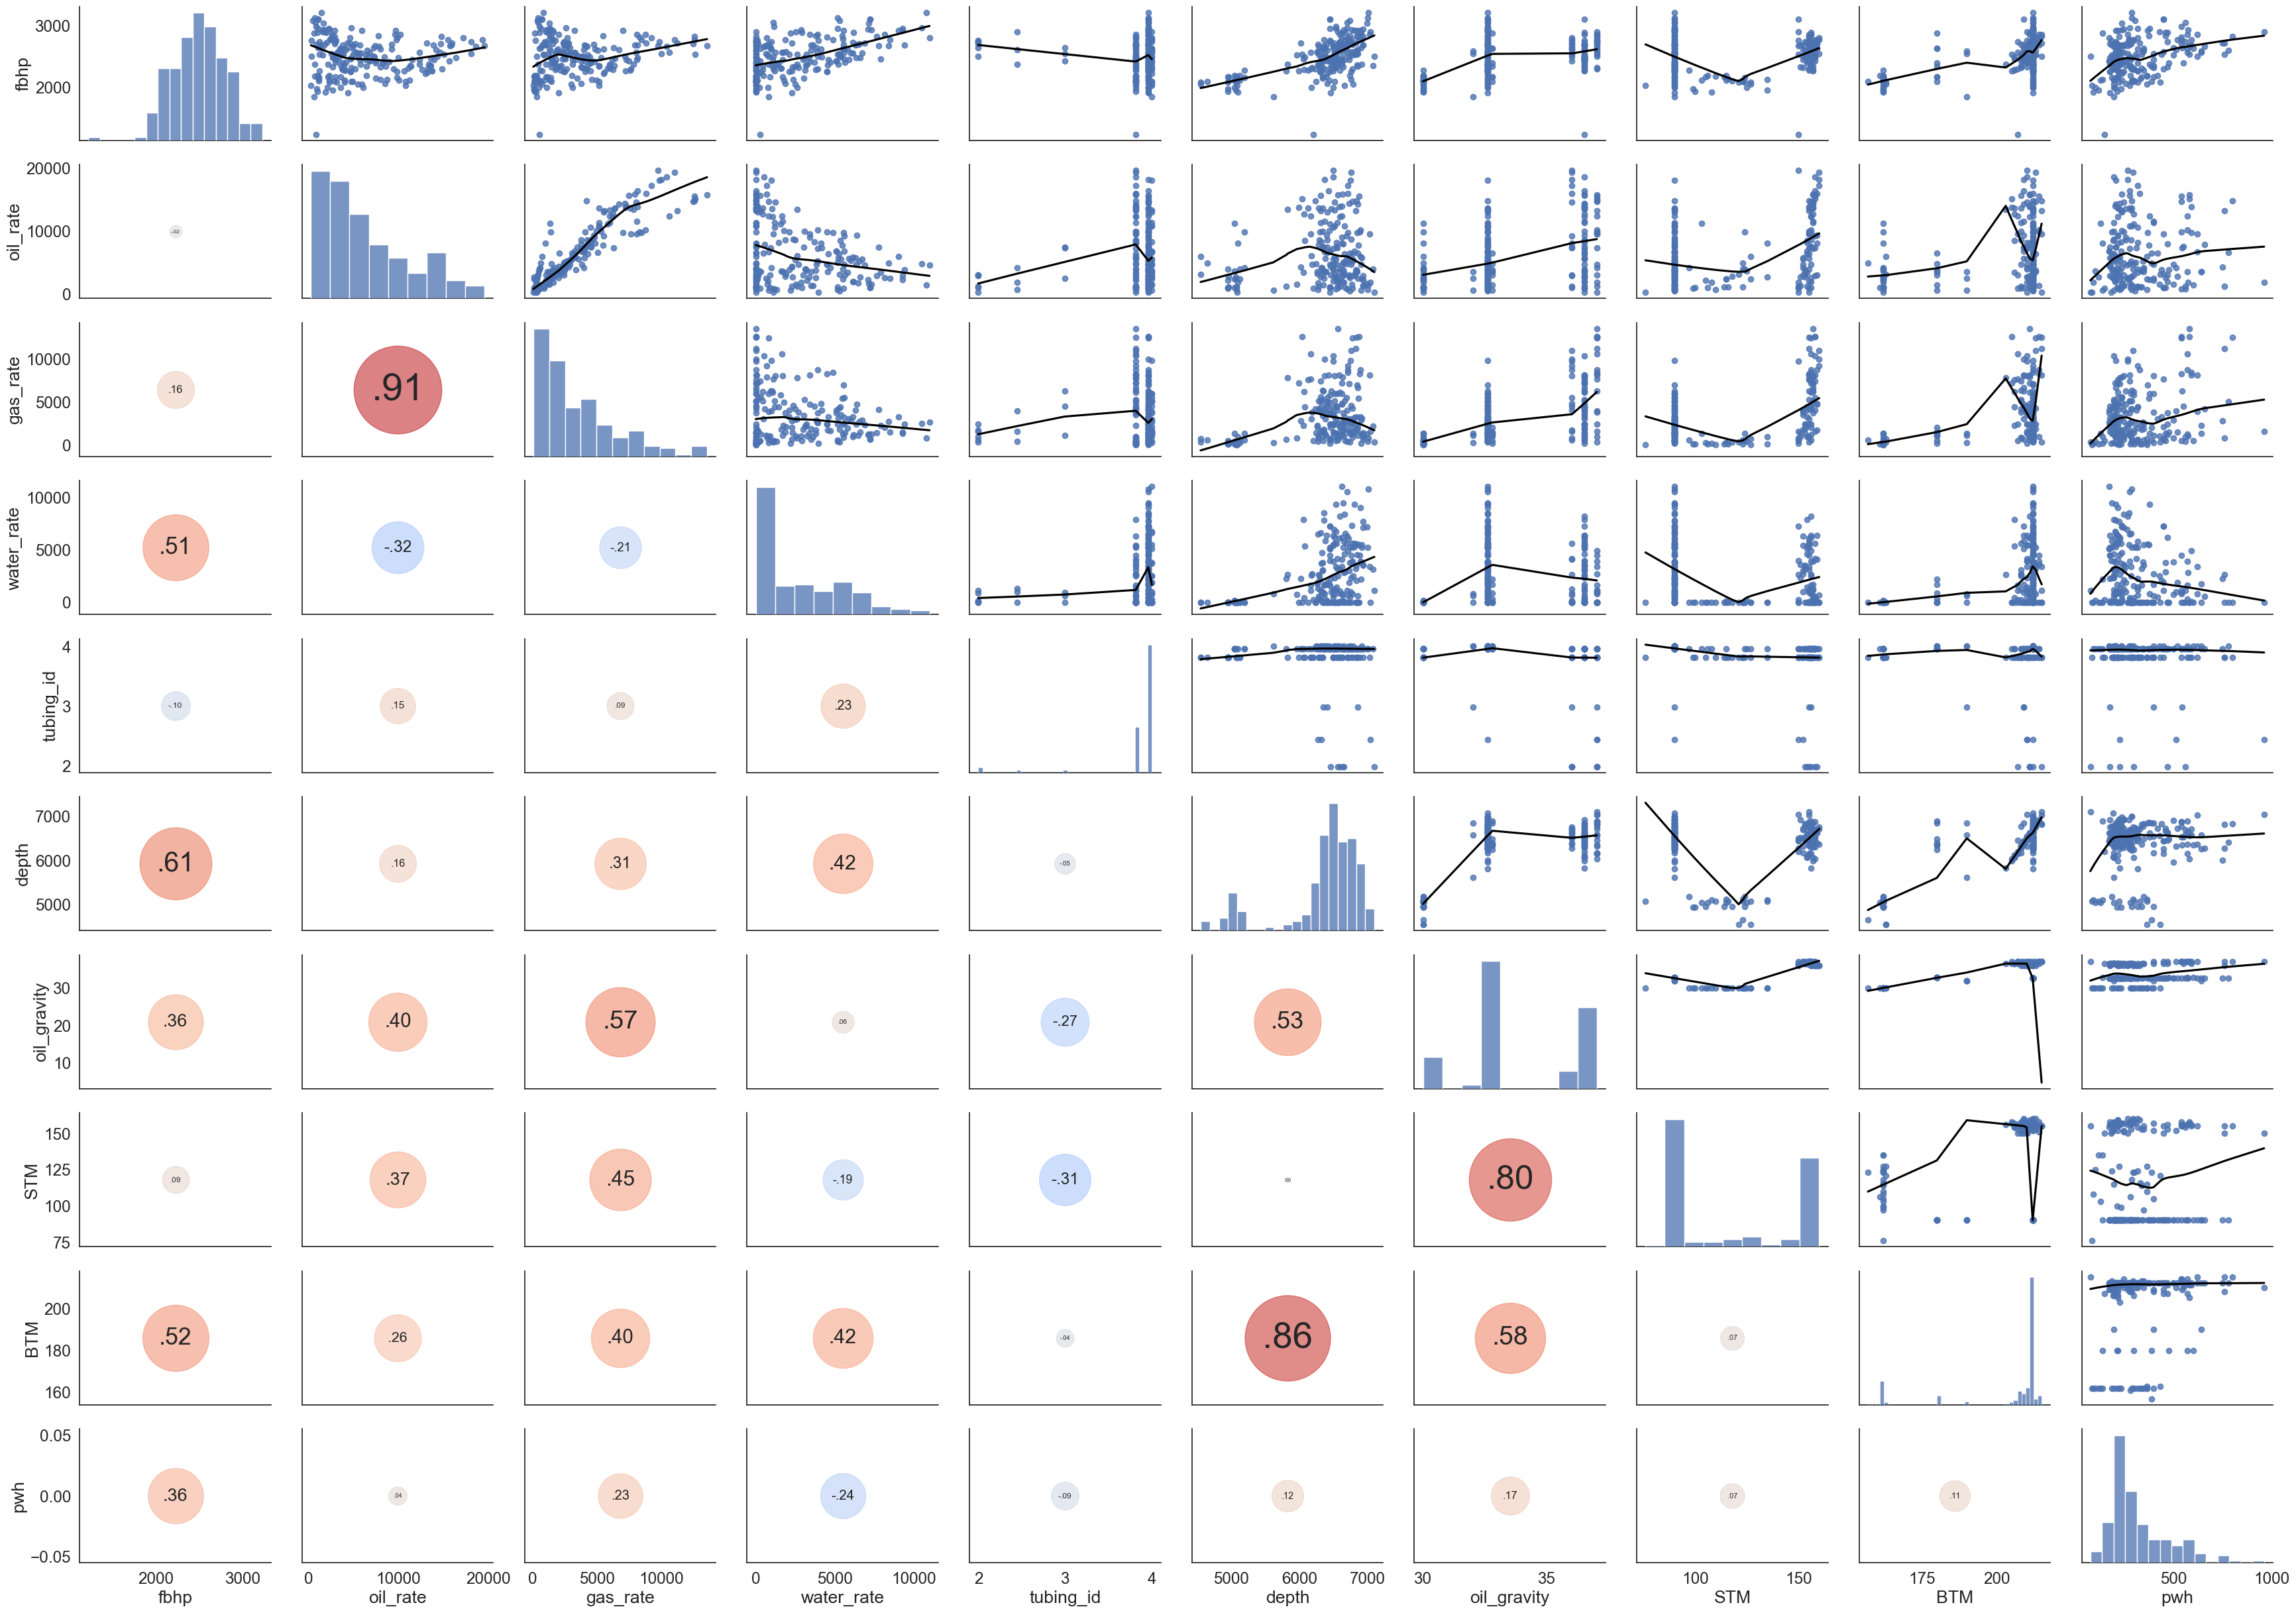

In [7]:
# Examining the scatter plot of paired data
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)

g = sns.PairGrid(df, aspect=1.4, diag_sharey=False)

g.map_upper(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_lower(corrdot)

# Feature selection

In [8]:
# Avoid adding duplicated dummy variables from Tubing_ID
if sum([col.startswith('tubing') for col in df.columns]) == 1:
    # create dummy variable for Tubing_ID
    tubing_dummy_vars = pd.get_dummies(df['tubing_id'], prefix='tubing_id').astype(int)
    df = pd.concat([df, tubing_dummy_vars], axis=1)
    # remove the last dummy variable
    df = df.drop(['tubing_id','tubing_id_4.0'], axis=1)

When building a machine learning model, it is important to split the dataset into training and testing sets before performing any feature engineering or data preprocessing steps. This is to avoid data leakage, which can lead to overly optimistic performance estimates and ultimately result in poor generalization performance of the model on unseen data.

Data leakage occurs when information from the test set is unintentionally included in the training set. This can happen when feature engineering or data preprocessing steps are performed on the entire dataset before splitting it into training and testing sets. In this case, the model may learn information about the test set from the training set, which can result in overly optimistic performance estimates on the test set.

To avoid data leakage, it is recommended to split the dataset into training and testing sets first, and then perform any feature engineering or data preprocessing steps on the training set only. This ensures that the model does not have access to information from the test set during training, and provides a more accurate estimate of the model's generalization performance on unseen data.

Therefore, we will handle the testing set based on the statistics of the training set.

Since we have multiple predictors and each one has a different magnitude, this can result in creating a bias in terms of variable importance. The model will consider the variables that have higher magnitudes more important and thus have large coefficients compared with low magnitude variables. Therefore, the data was scaled using the maximum and minimum values of each variable rather than mean and standard deviation as all predictors do not follow a normal distribution.



In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# assume df is the pandas DataFrame containing the data

# split data into 80% training and 20% test sets
train_X, test_X, train_y, test_y = train_test_split(df.iloc[:,1:], df.iloc[:,0:1], test_size=0.2, random_state=42)
train_X.reset_index(drop=True, inplace=True)
test_X.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)



# scale the data using MinMaxScaler
scaler_X = MinMaxScaler()
train_X_scaled = scaler_X.fit_transform(train_X)
test_X_scaled = scaler_X.transform(test_X)

scaler_y = MinMaxScaler()
# train_y_scaled = scaler_y.fit_transform(train_y)
# test_y_scaled = scaler_y.transform(test_y)

# convert the scaled arrays to dataframes
train_X_scaled = pd.DataFrame(train_X_scaled, columns=train_X.columns)
test_X_scaled = pd.DataFrame(test_X_scaled, columns=test_X.columns)

# print the shapes of the resulting dataframes
print(f'Training set: {train_X_scaled.shape} shape')
print(f'Test set: {test_X_scaled.shape} shape')



Training set: (164, 13) shape
Test set: (42, 13) shape


## Model  Development

**Linear regression (LR)** is a statistical method used to model the relationship between a dependent variable and one or more independent variables. Since we are interested in building a model that is interpretable besides prediction, we have to ensure that certain assumptions are met in order to obtain accurate and reliable coefficients. There are several key assumptions that must be met when performing a LR analysis, including:
1.	`Linearity`: The relationship between the dependent variable and the independent variables must be linear. 

2.	`Independence`: The observations and errors should be independent of each other. This means that the value of the dependent variable for one observation should not be influenced by the value of the dependent variable for another observation. The same goes on errors.

3.	`Homoscedasticity and zero mean`: The variance of the errors should be constant across all levels of the independent variable and the mean of these residuals should be zero. 

4.	`Normality`: The errors should be normally distributed. 


If these assumptions are not met, the results of the LR analysis may be biased or unreliable, which could lead to incorrect conclusions. We start with the first assumption by checking the linearity between the predictors and response variable. It is clear from paired plot that most of the predictors do not have a linear relationship with FBHP except for DEPTH, Water_rate and BTM which are relatively linear. This suggests variables transformation to capture non-linearity, but let's first with feeding the original features into lr model and if it doesn't show us a good performance, we will try to improve from there. 

# Linear regression before feature transformation (original features)

In [10]:
# Let's check how the model will perform on different sets of data 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(train_X_scaled, train_y)

# Perform 5-fold cross-validation, and calculate RMSE and R2 score
cv_rmse = np.sqrt(-cross_val_score(model, train_X_scaled, train_y, cv=5, scoring='neg_mean_squared_error'))
cv_r2 = cross_val_score(model, train_X_scaled, train_y, cv=5, scoring='r2')
# Print results
print("Cross-validation RMSE scores:", cv_rmse)
print("Mean cross-validation RMSE:", cv_rmse.mean())
print("Standard deviation cross-validation RMSE:", cv_rmse.std())
print("Cross-validation R-squared scores:", cv_r2)
print("Mean cross-validation R-squared:", cv_r2.mean())
print("Standard deviation cross-validation R-squared:", cv_r2.std())
print("="*60)

# Evaluate the model using the testing data
test_preds = model.predict(test_X_scaled)
r2_test = r2_score(test_y, test_preds)
rmse_test = np.sqrt(mean_squared_error(test_y, test_preds))
mae_test = mean_absolute_error(test_y, test_preds)
# Print results
print("Evaluate the model using the testing data")
print("="*60)
print("R-squared score on testing set:", r2_test)
print("RMSE score on testing set:", rmse_test)
print("MAE score on testing set:", mae_test)



Cross-validation RMSE scores: [161.66311508 155.52307412 211.95712281 181.10503108 238.34004182]
Mean cross-validation RMSE: 189.7176769819704
Standard deviation cross-validation RMSE: 31.270542979283835
Cross-validation R-squared scores: [0.63171037 0.72981925 0.4277371  0.69387324 0.48362662]
Mean cross-validation R-squared: 0.5933533172348857
Standard deviation cross-validation R-squared: 0.1180399498268074
Evaluate the model using the testing data
R-squared score on testing set: 0.7057846463941682
RMSE score on testing set: 153.45453796594893
MAE score on testing set: 107.77515092529421


The results are not good, 153 psi difference from the actual values on average is still high. This is because that the predictors on their original form can only explained around 70% of FBHP (TARGET FEATURE). This suggest that there is room for improvement and this can be done by variables transformation. Let's see how we can perform this transformation. Here is an improved version of the text you provided:

"Most of the predictors show a nonlinear relationship with FBHP, except for DEPTH, Water_rate, and BTM, which exhibit relatively linear patterns. This suggests the need for variable transformation to capture the nonlinearity. Additionally, Oil_rate and Gas_rate demonstrate a quadratic relationship with FBHP, indicating the potential for creating polynomial equations of order 2 for each variable. Furthermore, Oil_rate and Gas_rate have an interdependence relationship, where the amount of gas rate depends on the amount of oil rate. This relationship can be represented by an interaction term, such as (Oil_rate * Gas_rate).

Tubing_ID is a categorical variable with six categories: [4, 2.441, 3.813, 3.958, 1.995, 2.992] inches. To incorporate Tubing_ID into the analysis, it will be converted into five dummy variables.

Based on domain knowledge, there is a high possibility of data and structural multicollinearity. Data collinearity arises from a high degree of correlation between two original predictors. Examples of data multicollinearity include (Oil_rate & Gas_rate), (DEPTH & BTM), and (Oil_gravity & STM). On the other hand, structural multicollinearity is an artificial multicollinearity that emerges when creating new features from existing ones, such as the polynomial equations for oil & gas rates and the interaction term.

Multicollinearity can cause several issues, including:
1. Unreliable model coefficients: Colinear predictors make it challenging for the model to estimate the contribution of each predictor accurately, leading to incorrect sign and magnitude of regression coefficients.
2. Inflated standard errors: Multicollinearity can inflate the standard errors of regression coefficients, making it difficult to determine which variables are statistically significant.

Therefore, it is important to address multicollinearity before estimating the model's parameters and assessing their statistical significance. To mitigate multicollinearity, the following strategies were implemented:
1. Interaction terms: By combining the useful information of both variables into one variable, multicollinearity can be reduced. For example, (Oil * Gas) and (DEPTH * Pwh) are used as interaction terms.
2. Linear transformation: Linear transformations are preferable for predictors that do not exhibit interdependence, as they are more interpretable. An example is the difference between BTM and STM, denoted as "BTM-STM_diff."
3. Centering predictors: Centering involves subtracting each value of a variable from its mean. When creating a second-order polynomial equation for Oil_rate and Gas_rate, we square the centered variables (Oil_rate_C and Gas_rate_C) instead of the original variables. This approach creates a curvature relationship between Oil_rate2 and Oil_rate, thereby minimizing the linear relationship.

By implementing these strategies, we can effectively reduce multicollinearity and improve the reliability and interpretability of the model."

In [11]:
# Create higher order terms and interaction terms to capture non-linearity in TRAINING SET
# Perform linear transformation (subtraction) and centering predictors to reduce multicollinearity
# c dentoes the variable is centered around the mean
train_X_scaled['oil_rate_c'] =  train_X_scaled['oil_rate'] - train_X_scaled['oil_rate'].mean()
train_X_scaled['gas_rate_c'] = train_X_scaled['gas_rate'] - train_X_scaled['gas_rate'].mean()
train_X_scaled['oil_rate_c_squared'] = train_X_scaled['oil_rate_c']**2
train_X_scaled['gas_rate_c_squared'] = train_X_scaled['gas_rate_c']**2
train_X_scaled['depth_c'] = train_X_scaled['depth'] -  train_X_scaled['depth'].mean()
train_X_scaled['depth_c_squared'] = train_X_scaled['depth_c']**2
train_X_scaled['pwh_c'] = train_X_scaled['pwh'] -  train_X_scaled['pwh'].mean()
train_X_scaled['depth_pwh'] = train_X_scaled['depth'] * train_X_scaled['pwh']
train_X_scaled['depth_c_Pwh_c'] = train_X_scaled['depth_c'] * train_X_scaled['pwh_c']
train_X_scaled['pwh_squared'] = train_X_scaled['pwh_c']**2
train_X_scaled['oil_c_gas_c'] = train_X_scaled['oil_rate_c'] * train_X_scaled['gas_rate_c']
train_X_scaled['BTM_STM_diff'] = train_X_scaled['BTM'] - train_X_scaled['STM']


In [12]:
# Create features for the testing set by taking the mean of the corresponding variables in the training set.
# This is because during model serving, we will not have access to the test set statistics.
test_X_scaled['oil_rate_c'] =  test_X_scaled['oil_rate'] - train_X_scaled['oil_rate'].mean()
test_X_scaled['gas_rate_c'] = test_X_scaled['gas_rate'] - train_X_scaled['gas_rate'].mean()
test_X_scaled['oil_rate_c_squared'] = test_X_scaled['oil_rate_c']**2
test_X_scaled['gas_rate_c_squared'] = test_X_scaled['gas_rate_c']**2
test_X_scaled['depth_c'] = test_X_scaled['depth'] -  train_X_scaled['depth'].mean()
test_X_scaled['depth_c_squared'] = test_X_scaled['depth_c']**2
test_X_scaled['pwh_c'] = test_X_scaled['pwh'] -  train_X_scaled['pwh'].mean()
test_X_scaled['depth_pwh'] = test_X_scaled['depth'] * test_X_scaled['pwh']
test_X_scaled['depth_c_pwh_c'] = test_X_scaled['depth_c'] * test_X_scaled['pwh_c']
test_X_scaled['pwh_squared'] = test_X_scaled['pwh_c']**2
test_X_scaled['oil_c_Gas_c'] = test_X_scaled['oil_rate_c'] * test_X_scaled['gas_rate_c']
test_X_scaled['BTM_STM_diff'] = test_X_scaled['BTM'] - test_X_scaled['STM']

The mathematical notation for the linear transformation of a predictor variable x:

$x^* = x^{\alpha}$

where $x$ is the original predictor variable, alpha is a scaling parameter, and $x^*$ is the transformed predictor variable.
The following code applies the transformation for various values of alpha ranging from -2 to 2.5 in steps of 0.5.

The logarithmic transformation applied to the predictor variable $x$ is given by:

$x^* = \log(x)$

The main purpose of linearly transforming predictors is to improve their correlation with the target feature (FBHP) in the training dataset.
This is important in linear modeling because higher correlation between predictors and the target feature leads to a more accurate model.
Additionally, transforming predictors can help to overcome certain statistical issues such as non-linearity, non-normality, and heteroscedasticity. 
By applying appropriate transformations, we can improve the distributional properties of the predictor variables and reduce the heteroscedasticity, thereby improving the accuracy and reliability of the model.

In [13]:
# This code will apply all the possible suggested transformation for each variable
# Linearly transform predictors
column_names = []
Linear_transformed = []
# Exclude variables with 'Tubing' in their name
col_without_tubing = [col for col in train_X_scaled.columns if not col.startswith('tubing')]
df_without_tubing = train_X_scaled[col_without_tubing]
for col in df_without_tubing.corr():
    # Track the transformed variable 
    column_names.append(col)
    for i in np.arange(-2, 2.5, 0.5):
        # Transform the variable in df_without_tubing
        X = df_without_tubing[col]**i
        # compute the correlation
        linear_correlation = X.corr(train_y.squeeze())
        Linear_transformed.append([i, linear_correlation])
    # compute the correlation after logarithmic transformation
    # Check if the column has any negative values
    if any(df_without_tubing[col] < 0):
        # If the column has negative values, skip the transformation
        Linear_transformed.append(['LOG', np.nan])
    else:
        # If the column does not have negative values, apply the transformation
        # add a small number to the variableto avoid divide by zero error
        log_transformed = np.log(df_without_tubing[col]+1e-10)
        linear_correlation_log = log_transformed.corr(train_y.squeeze())
        Linear_transformed.append(["LOG", linear_correlation_log])

# Create a df for the correation of the transformed predictor and the correspodning scaling parameter
Linear_transformed = pd.DataFrame(Linear_transformed, columns=["Transformation", "Correlation"])
# # Calculates the length of the list generated by scaling for each variable and adds 1 to account for
# #  the logarithmic transformation that was also performed.
Linear_transformed["Variable"] = np.repeat(column_names, len(np.arange(-2, 2.5, 0.5)) + 1)

# Group the data by column 'B'
grouped = Linear_transformed.groupby('Variable')

# Apply the idxmax function to each group
max_index = grouped['Correlation'].idxmax()

# Extract the rows corresponding to the max value in each group
# correlation of predictors with Target feature (FBHP)after transformation
result = Linear_transformed.loc[max_index]

# merge the perason correlation before and after transformation
# correlation of predictors with Target feature (FBHP) before transformation
train = pd.concat([df_without_tubing, train_y], axis=1).corr().iloc[:-1,-1]
result = result.merge(train, left_on='Variable', right_index=True)
# rename the columns according to the specified transformations
result = result.rename(columns={
    'Transformation': 'Transformation_type',
    'Correlation': 'After_transformation',
    'fbhp': 'Before_transformation'
})

# Reorder the columns according to the specified order
result = result.reindex(columns=['Variable', 'Before_transformation', 'After_transformation', 'Transformation_type'])
print('The linear correlation (Pearson) of predictors with Target feature (FBHP) before and after transformation')
result

The linear correlation (Pearson) of predictors with Target feature (FBHP) before and after transformation


,Variable,Before_transformation,After_transformation,Transformation_type
66,BTM,0.486226,0.486226,1.0
196,BTM_STM_diff,0.235932,0.235932,1.0
58,STM,0.111245,0.153700,2.0
38,depth,0.588512,0.601423,2.0
126,depth_c,0.588512,0.588512,1.0
161,depth_c_Pwh_c,-0.136606,0.113685,-1.5
133,depth_c_squared,-0.407323,0.026646,-0.5
155,depth_pwh,0.498697,0.567749,0.5
19,gas_rate,0.167714,0.226848,LOG
97,gas_rate_c,0.167714,0.499815,1.5


The previous dataframe shows the change in Pearson correlation before and after the transformation and the transformation that will yield the highest correlation will be selected. Unfortunately, None of the transformed variables produced a good outcome. Even if the transformation increased the linear correlation for some variables, this increase does not offset the complexity that will be added because of this transformation, hence none of the transformed variables was considered. Before we proceed with estimating model’s parameters, we can check the multicollinearity using Variance Inflation Factor (VIF). VIF is a better measure of multicollinearity than a correlation matrix because it is more comprehensive, provides a threshold for identifying multicollinearity, incorporates all the other independent variables in the model, and helps with variable selection. A threshold of 10 VIF was selected because it was observed during experimentation that predictors with VIF less than 10 still have stable regression coefficients. Adjusted R-squared is used for models comparison as it accounts for number of predictors and observations in each model and produce unbiased performance measure. If we rather chose R-squared, the models that have more predictors, will have higher R-squared, leading to unreliable results. 

In [14]:
def reduce_vif(X,  threshold=10):
    '''
    Returns a dataframe of predictor combinations with VIF values below a given threshold
    
    Parameters
    ----------
    X : pandas dataframe
        dataframe containing all the predictors to be considered
    threshold : float
        vif threshold value

    Return
    ---------
    best combination of predictors that have VIF less than the user-defined threshold
     along with the corresponding adjusted r-squared
    '''
    result = []
    # Loop through all possible combinations of predictors
    for n in range(2, len(X.columns)):
        for combination in combinations(X.columns, n):
            # Calculate VIF for the predictors in the current combination
            x = X[list(combination)]
            vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
            # If the maximum VIF is below the threshold, add the combination to the result list
            if max(vif) < threshold:
                result.append((max(vif), str(list(combination))))
    # Return the result list as a dataframe
    return pd.DataFrame(result, columns=['VIF', 'combinations'])

In [35]:
import warnings

# Suppress the specific RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning, module="statsmodels")

def fit_model(combination, X, y):
    """
    Fit a linear model on the optimal predictor obtained with reduce_vif()
    """
    # Add a constant to the predictors for the intercept term
    predictors = sm.add_constant(X[combination])
    # Fit the MLR model
    model = sm.OLS(y.values, predictors).fit()
    adj_rsquared = model.rsquared_adj

    # Initialize the max_adj_rsquared and best_combination variables
    max_adj_rsquared = -inf
    best_combination = None

    # If the current combination has a higher R-squared than the previous best, update the max R-squared and best combination       
    if adj_rsquared > max_adj_rsquared:
        max_adj_rsquared = adj_rsquared
        best_combination = combination
    return best_combination, max_adj_rsquared

X = train_X_scaled.iloc[:,:10]
y = train_y
# Reduce the predictors to only those with VIF values below the threshold
results_VIF = reduce_vif(X, threshold=10.0)
# Convert the combinations in the result_VIF dataframe from tuples to lists
result_VIF = [ast.literal_eval(item) for item in results_VIF['combinations']]
# Fit MLR models for each combination of predictors and store the best combination and max R-squared for each
best_combinations = [fit_model(com, X, y) for com in result_VIF]
# Convert the list of best combinations and max R-squareds to a dataframe
best_combinations_rsq = pd.DataFrame(best_combinations, columns=['best_combinations', 'adj_rsquared'])
# calculate the number of variables for each combination 
best_combinations_rsq['combination_count'] = best_combinations_rsq['best_combinations'].apply(len)
best_combinations_rsq.sort_values("adj_rsquared", ascending = False)

,best_combinations,adj_rsquared,combination_count
344,"[water_rate, depth, STM, pwh, tubing_id_1.995]",0.670351,5
383,"[water_rate, depth, STM, pwh, tubing_id_1.995,...",0.668240,6
370,"[gas_rate, water_rate, depth, STM, pwh, tubing...",0.668238,6
385,"[gas_rate, water_rate, depth, STM, pwh, tubing...",0.666100,7
233,"[water_rate, depth, STM, pwh]",0.656469,4
...,...,...,...
36,"[STM, tubing_id_2.441]",0.012709,2
42,"[tubing_id_1.995, tubing_id_2.441]",0.007377,2
6,"[oil_rate, tubing_id_1.995]",0.002650,2
69,"[oil_rate, tubing_id_1.995, tubing_id_2.441]",0.001136,3


VIF is not the only factor that should considered for variable selection, but also there are other considerations. The selection strategy of the best model is based on a few things:
1. High adjusted R-squared 
2. Less number of predictors ( principal of parsimony)
3. Another factor to consider when selecting predictor variables for a model is whether they can be easily and inexpensively collected, as there may be different sets of predictors that produce similar adjusted R-squared values, or the difference in adjusted R-squared may not justify the difficulty and cost of collecting additional predictors
4. The resultant  direction and magnitude of regression coefficients are consistent with literature.
5.	The complexity of interpretation: If two combinations produced slightly different adjusted R-squared, the combination set that has less number of transformed variables is selected as this will facilitate the interpretation of coefficients to the non-technical audience. 
The following variables meet the criteria of best model selection. We have five variables that meets the criteria and do not severely suffer from multicollinearity. 


In [16]:
# extract the independent variables
X = train_X_scaled[[
'oil_rate_c_squared', 'depth','water_rate','tubing_id_1.995', 'pwh'
]]

# calculate the VIF for each variable
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,oil_rate_c_squared,1.915892
1,depth,8.815059
2,water_rate,3.417202
3,tubing_id_1.995,1.079199
4,pwh,3.466826


# Modeling

In [17]:
#fit a MLR model
predictors = sm.add_constant(train_X_scaled[['oil_rate_c_squared', 'depth','water_rate','tubing_id_1.995', 'pwh']])
# Fit the MLR model
model_lr = sm.OLS(train_y, predictors).fit()
print(model_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   fbhp   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     92.55
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           3.97e-45
Time:                        15:14:39   Log-Likelihood:                -1058.6
No. Observations:                 164   AIC:                             2129.
Df Residuals:                     158   BIC:                             2148.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1748.6775     44

# Evalauting with cross-valdiation

In [18]:
# Create linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(predictors.values, train_y.values)

# Calculate the evaluation metrics on the training data
# train_preds = model.predict(predictors.values)
# r2_train = r2_score(train_y.values, train_preds)
# rmse_train = np.sqrt(mean_squared_error(train_y.values, train_preds))

# Perform 5-fold cross-validation, and calculate RMSE and R2 score
cv_rmse = np.sqrt(-cross_val_score(model, predictors.values, train_y.values, cv=5, scoring='neg_mean_squared_error'))
cv_r2 = cross_val_score(model, predictors.values, train_y.values, cv=5, scoring='r2')

# Print results
# print("Training R-squared:", r2_train)
# print("Training RMSE:", rmse_train)
print("Cross-validation RMSE scores:", cv_rmse)
print("Mean cross-validation RMSE:", cv_rmse.mean())
print("Standard deviation cross-validation RMSE:", cv_rmse.std())
print("Cross-validation R-squared scores:", cv_r2)
print("Mean cross-validation R-squared:", cv_r2.mean())
print("Standard deviation cross-validation R-squared:", cv_r2.std())

Cross-validation RMSE scores: [158.35221236 117.07008458 173.9354796  146.07487692 201.92948916]
Mean cross-validation RMSE: 159.47242852289793
Standard deviation cross-validation RMSE: 28.25062791982012
Cross-validation R-squared scores: [0.64664123 0.84690655 0.61463176 0.80084495 0.62934547]
Mean cross-validation R-squared: 0.7076739929800621
Standard deviation cross-validation R-squared: 0.09652330876316327


The cross-validation results you have provided suggest that the mean RMSE across all folds is 0.737. This indicates that on average, the model's predictions are off by about 0.737 units from the true values. 

# Diagnostic tests

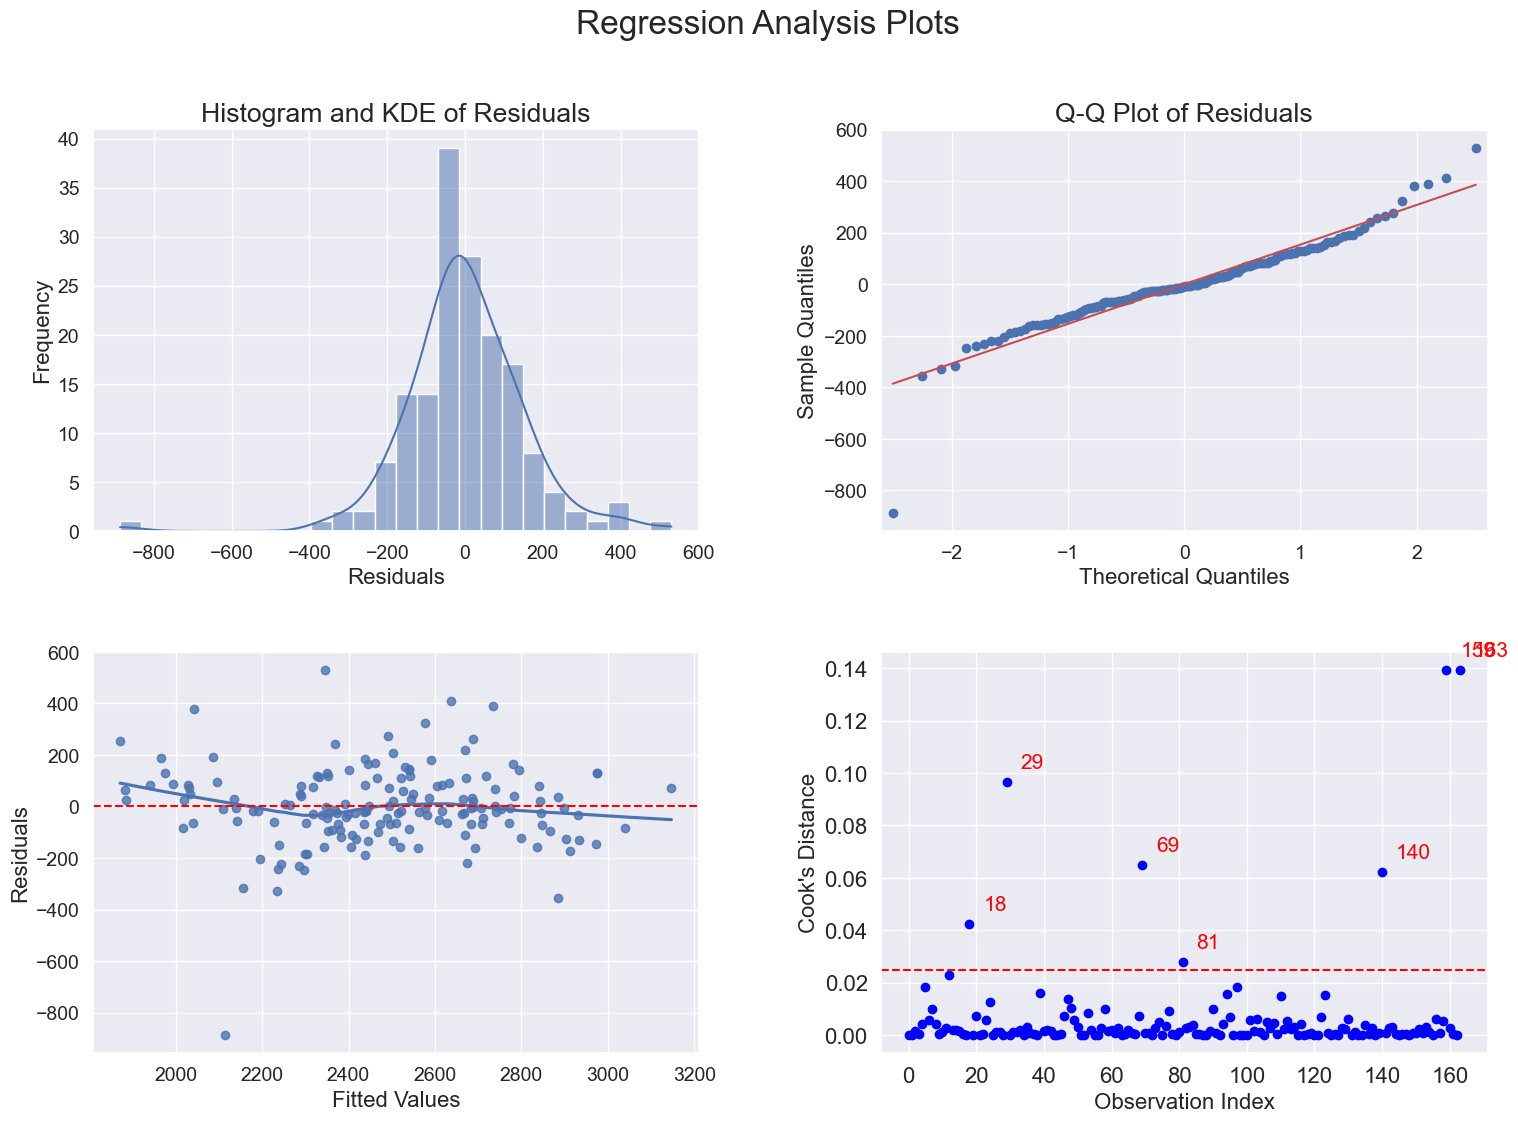

In [19]:
exog = model_lr.model.exog
resid = model_lr.resid

# Set the style of the plot
sns.set_style('darkgrid')

# Create a figure with two subplots, arranged in a 2x2 grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Plot the histogram and KDE on the first subplot
sns.histplot(resid, kde=True, ax=ax1)
ax1.set_title('Histogram and KDE of Residuals')

# Set the font size for the axes labels and ticks for the first subplot
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Residuals', fontsize=16)
ax1.set_ylabel('Frequency', fontsize=16)



# Generate the Q-Q plot on the second subplot
sm.qqplot(resid, line='s', ax=ax2)
ax2.set_title('Q-Q Plot of Residuals')

# Set the font size for the axes labels and ticks for the third subplot
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Theoretical Quantiles', fontsize=16)
ax2.set_ylabel('Sample Quantiles', fontsize=16)


# Plot the residual plot on the third subplot
# sns.regplot(x=model.fittedvalues, y=resid, lowess=True, scatter_kws={"color": "blue", "alpha": 0.3, "s": 100})
sns.regplot(x=model_lr.fittedvalues, y=resid, lowess=True, ax=ax3)
# Add horizontal lines at y=300 and y=-300 on the second subplot
# ax3.axhline(y=300, color='red', linestyle='--')
ax3.axhline(y=-0, color='red', linestyle='--')

# Increase font size of x and y labels and ticks for the second subplot
ax3.set_xlabel('Fitted Values', fontsize=16)
ax3.set_ylabel('Residuals', fontsize=16)
ax3.tick_params(labelsize=14)


# Calculate Cook's distance
influence = model_lr.get_influence()
cooks_d = influence.cooks_distance[0]

# Observations that have a Cook-distance value that is 4 times larger than the mean value of
# Cook-distance will be classified as influential observations
threshold = cooks_d.mean() * 4
influential_points = np.where(cooks_d > threshold)[0]

# Create the Cook's distance plot on the fourth subplot
ax4.scatter(range(len(exog)), cooks_d, color='blue')

# Add a horizontal line showing the threshold
ax4.axhline(y=threshold, color='red', linestyle='--')

# Label the influential points on the Cook's distance plot
for i in influential_points:
    ax4.annotate(str(i), (i, cooks_d[i]), xytext=(10, 10), textcoords='offset points', fontsize=15, color='red')

# Set the font size for the axes labels and ticks for the fourth subplot
ax4.tick_params(labelsize=14)
ax4.set_xlabel('Observation Index', fontsize=16)
ax4.set_ylabel("Cook's Distance", fontsize=16)

# Add labels and title to the plot
fig.suptitle('Regression Analysis Plots', fontsize=24)

# Set the font size of the tick labels
plt.tick_params(labelsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the plot
plt.show()


##  Analysis

Here, we can use the R-squared to measure the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model. The summary shows that 74.5% of variance in FBHP is explained by the selected predictors. F-statistics evaluates the overall significance of the model. The F-statistics is used to test the null hypothesis that all the regression coefficients in a model are equal to zero, which means that the independent variables have no effect on the dependent variable. If the F-statistics is large and the corresponding p-value is small (less than 0.05), we reject the null hypothesis and conclude that at least one of the independent variables is significantly related to the dependent variable. In this case, the probability of F-statistics is below the significance level 1 % which indicates β ≠0 for all predictors and we have a very strong evidence to reject the null hypothesis and all variables are statistically significant. This can be confirmed by referring to the p-value of each predictor which indicates the same statistical significance. 

If we look at the Confidence Interval (CI) of each coefficient, we can see that estimates are so far from zero which justifies why we have a very strong evidence to reject the null hypothesis. The CI also indicates that we are 95% confident that interval of each estimates in the regression model captures the slope of the true regression line relating the FBHP and all predictors. The purpose of conducting statistical tests in regression analysis is to make inferences about the true relationship between the predictors and the response variable (FBHP) in the population. Since we do not know the exact relationship between these variables, we collected a sample of data to estimate this relationship. However, we need to ensure that our sample is representative of the population. In other words, we want to ensure that the resulting coefficients from our sample accurately reflect the coefficients we would obtain if we had data from the entire population. To assess the reliability of our sample estimates, we conduct statistical tests and determine the confidence interval within which we are 95% certain the coefficients will fall. 

The role of sampling distribution is important here because it can tell us how our estimates would vary if we collected repeated random samples of the same size. This distribution can be used to make inferences about the population regression slope, such as estimating its value and constructing confidence intervals or hypothesis tests. The coefficients are divided by the standard error which is similar to standard deviation but it is designed to explain the estimate deviation from its mean rather than the sample observations. The mean of the sampling distribution is the actual population estimate. In regression analysis, the standard error of the regression slope is a measure of how much variation there is in the estimated slope across different samples of the same size. A lower standard error means that the estimated slope is likely to be closer to the true population slope, and that we can be more confident in our estimate. The standard error here are small compared to the estimates which indicates that these estimates are closer to the actual parameters, hence we obtained very low p-values. High standard error reduces the precision and power of the estimate and hypothesis test, making it more difficult to detect a significant effect or difference between groups. However, to ensure these results are trustworthy in terms of accurate estimates, valid inference and accurate predictions, the model’s errors assumptions should be met. 

The second assumption is the independence of observations and errors. As for the observations, the data points have been collected from different middle eastern oil fields; therefore, this observations are independent. The plot of  residuals against predicted values illustrates that there is no systematic pattern in the residuals which indicate that all useful information has been absorbed well by the model. Moreover, the plot indicates that the residuals have zero mean and constant variance. The last assumption is residuals normality which can be confirmed by  histogram and Q-Q plot. Normality is important for accurate standard errors that have significant influence on the model inferential power. Cox-distance was employed to determine the observation that have a significant impact on the estimated coefficients or predicted values in a regression model. These points can be outliers, leverage points, or a combination of both. The points that four times larger from cox-distance mean are considered influential. 

Let's investigate the influential points

In [20]:
# inverse transform the scaled data
train_X_inversed = scaler_X.inverse_transform(train_X_scaled[df.columns[1:]])
influ_in_train_X = train_X_inversed[influential_points] 
pd.DataFrame(influ_in_train_X, columns=df.columns[1:])

,oil_rate,gas_rate,water_rate,depth,oil_gravity,STM,BTM,pwh,tubing_id_1.995,tubing_id_2.441,tubing_id_2.992,tubing_id_3.813,tubing_id_3.958
0,7480.0,4540.36,1.0,6406.0,36.0,156.0,209.0,180.0,0.0,0.0,1.0,0.0,0.0
1,1193.0,938.89,0.0,6597.0,37.0,154.0,211.0,560.0,1.0,0.0,0.0,0.0,0.0
2,600.0,169.09,2200.0,6901.0,32.8,90.0,180.0,140.0,0.0,0.0,0.0,0.0,1.0
3,781.0,413.03,1131.0,6700.0,32.6,90.0,212.0,560.0,0.0,0.0,0.0,0.0,1.0
4,1256.0,810.12,2634.0,6285.0,36.0,150.0,208.0,760.0,0.0,0.0,0.0,1.0,0.0
5,2952.0,1549.80,130.0,6630.0,36.0,158.0,211.0,180.0,1.0,0.0,0.0,0.0,0.0
6,887.0,502.93,252.0,6200.0,36.5,150.0,207.0,150.0,0.0,0.0,0.0,1.0,0.0


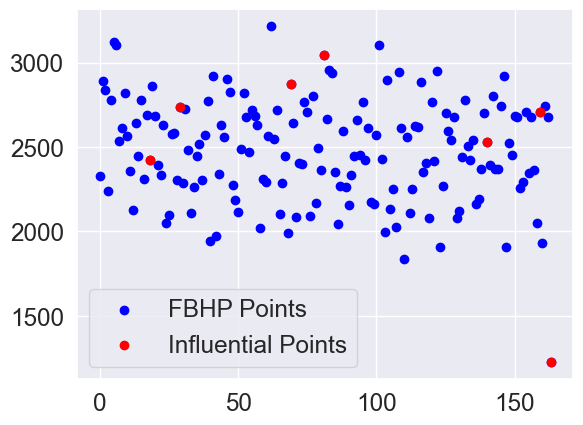

In [21]:
plt.scatter(train_y.index, train_y, color = "blue", label = "FBHP Points")
plt.scatter(influential_points, train_y.iloc[influential_points], color = "red", label = "Influential Points")
plt.legend()

The only points that seems to be incorrect are the value 1 for water rate (first row), and the point that is far from the distribution of the FBHP. We will remove these points and see how that would affect the model's performance. Rest of the influential points look normal.  

In [22]:
# # Remove outliers based on scatter plot of paired data and findings from cook-distance after lr modeling
# mask = train_y['fbhp'] < 1500
train_X_scaled['water_rate'][18] = 0
train_y = train_y.drop(163)
train_X_scaled = train_X_scaled.drop(163)

Let's perform the modeling again and diagnose its residuals

In [23]:
#fit a MLR model
predictors = sm.add_constant(train_X_scaled[['oil_rate_c_squared', 'depth','water_rate','tubing_id_1.995', 'pwh']])
# Fit the MLR model
model_lr = sm.OLS(train_y, predictors).fit()
print(model_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   fbhp   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     108.2
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           4.98e-49
Time:                        15:14:44   Log-Likelihood:                -1033.7
No. Observations:                 163   AIC:                             2079.
Df Residuals:                     157   BIC:                             2098.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1766.0167     40

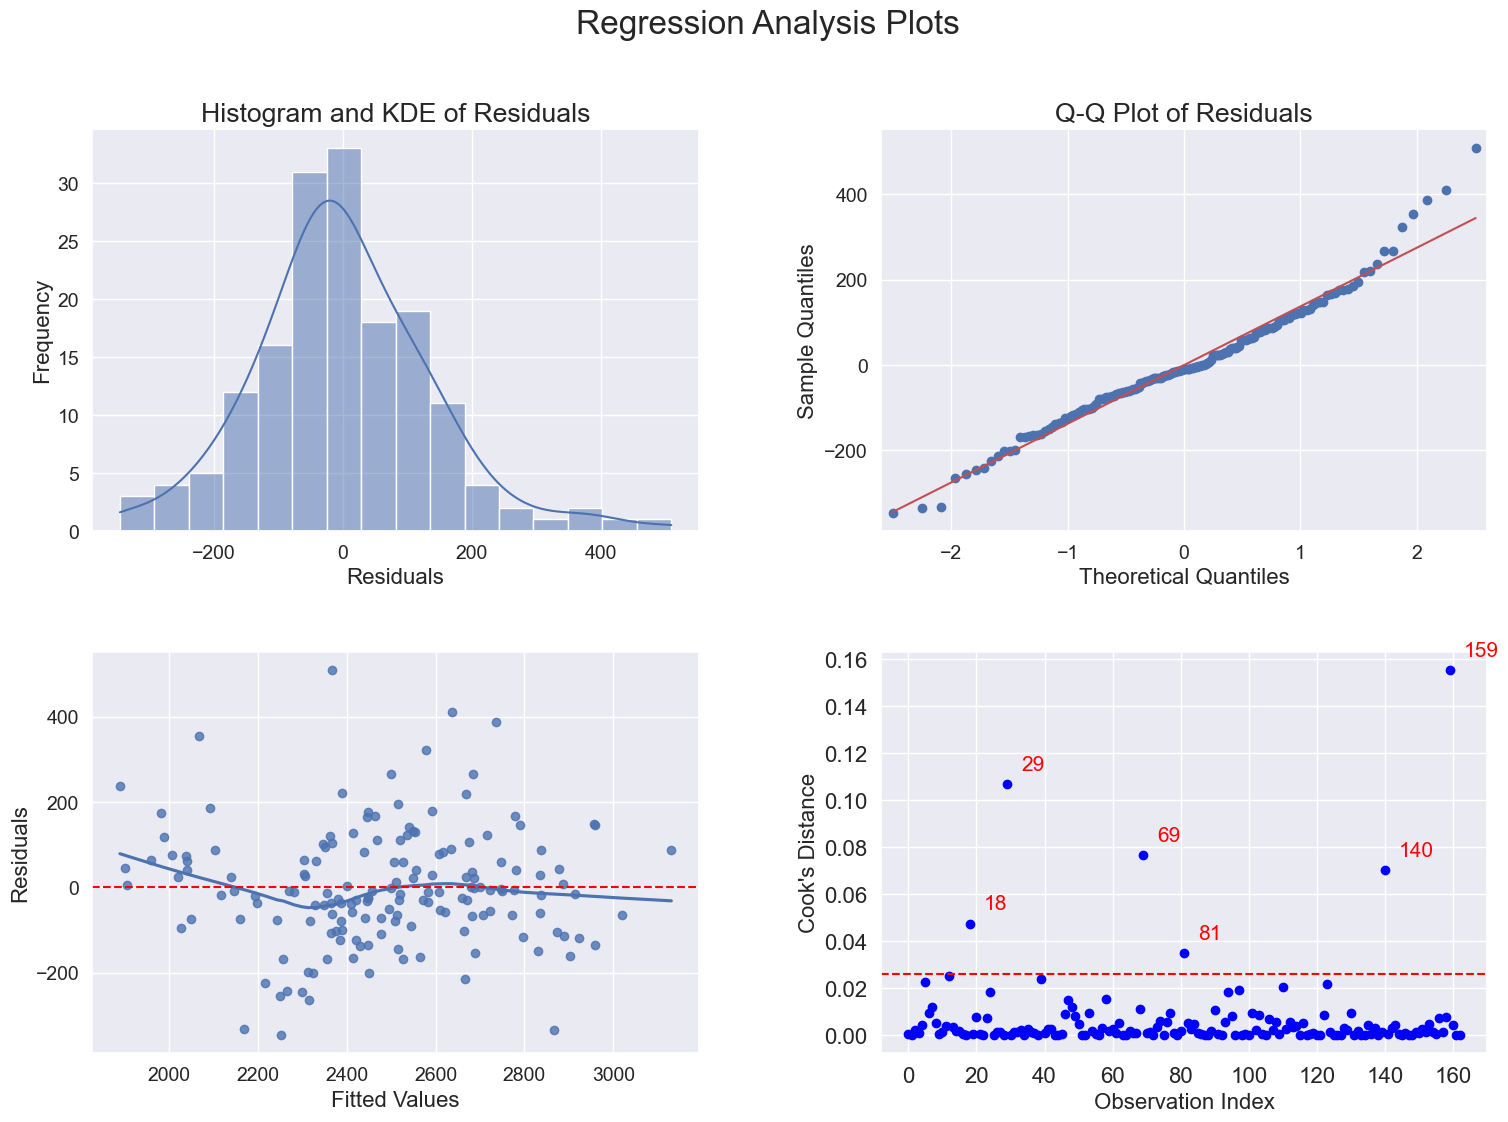

In [24]:
exog = model_lr.model.exog
resid = model_lr.resid

# Set the style of the plot
sns.set_style('darkgrid')

# Create a figure with two subplots, arranged in a 2x2 grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Plot the histogram and KDE on the first subplot
sns.histplot(resid, kde=True, ax=ax1)
ax1.set_title('Histogram and KDE of Residuals')

# Set the font size for the axes labels and ticks for the first subplot
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Residuals', fontsize=16)
ax1.set_ylabel('Frequency', fontsize=16)



# Generate the Q-Q plot on the second subplot
sm.qqplot(resid, line='s', ax=ax2)
ax2.set_title('Q-Q Plot of Residuals')

# Set the font size for the axes labels and ticks for the third subplot
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Theoretical Quantiles', fontsize=16)
ax2.set_ylabel('Sample Quantiles', fontsize=16)


# Plot the residual plot on the third subplot
# sns.regplot(x=model.fittedvalues, y=resid, lowess=True, scatter_kws={"color": "blue", "alpha": 0.3, "s": 100})
sns.regplot(x=model_lr.fittedvalues, y=resid, lowess=True, ax=ax3)
# Add horizontal lines at y=300 and y=-300 on the second subplot
# ax3.axhline(y=300, color='red', linestyle='--')
ax3.axhline(y=-0, color='red', linestyle='--')

# Increase font size of x and y labels and ticks for the second subplot
ax3.set_xlabel('Fitted Values', fontsize=16)
ax3.set_ylabel('Residuals', fontsize=16)
ax3.tick_params(labelsize=14)


# Calculate Cook's distance
influence = model_lr.get_influence()
cooks_d = influence.cooks_distance[0]

# Observations that have a Cook-distance value that is 4 times larger than the mean value of
# Cook-distance will be classified as influential observations
threshold = cooks_d.mean() * 4
influential_points = np.where(cooks_d > threshold)[0]

# Create the Cook's distance plot on the fourth subplot
ax4.scatter(range(len(exog)), cooks_d, color='blue')

# Add a horizontal line showing the threshold
ax4.axhline(y=threshold, color='red', linestyle='--')

# Label the influential points on the Cook's distance plot
for i in influential_points:
    ax4.annotate(str(i), (i, cooks_d[i]), xytext=(10, 10), textcoords='offset points', fontsize=15, color='red')

# Set the font size for the axes labels and ticks for the fourth subplot
ax4.tick_params(labelsize=14)
ax4.set_xlabel('Observation Index', fontsize=16)
ax4.set_ylabel("Cook's Distance", fontsize=16)

# Add labels and title to the plot
fig.suptitle('Regression Analysis Plots', fontsize=24)

# Set the font size of the tick labels
plt.tick_params(labelsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the plot
plt.show()


Wow! Treating the influential points has certainly paid off. It appears that particular point caused a slight deviation in the slope. The normality of the data has also improved. However, there is still some deviation in the normality which suggests a more complex model is needed as the non-linearity in the data is evident

# Evaluation

In [25]:
# Calculate the evalaution metrics for the test set
# Make predictions using the test set
test_y_pred = model_lr.predict(sm.add_constant(test_X_scaled[['oil_rate_c_squared', 'depth','water_rate','tubing_id_1.995', 'pwh']]))
# Calculate the evaluation metrics for the test set
mae = mean_absolute_error(test_y, test_y_pred)

# Print the evaluation metrics r2, rmse, mae for the test set
print('R-squared: {:0.2f}'.format(model_lr.rsquared))
print('RMSE: {:0.2f}'.format(np.sqrt(model_lr.mse_resid)))
print('MAE: {:0.2f}'.format(mae))

R-squared: 0.78
RMSE: 140.00
MAE: 103.28


In [26]:
test_y.min()

fbhp    1989
dtype: int64

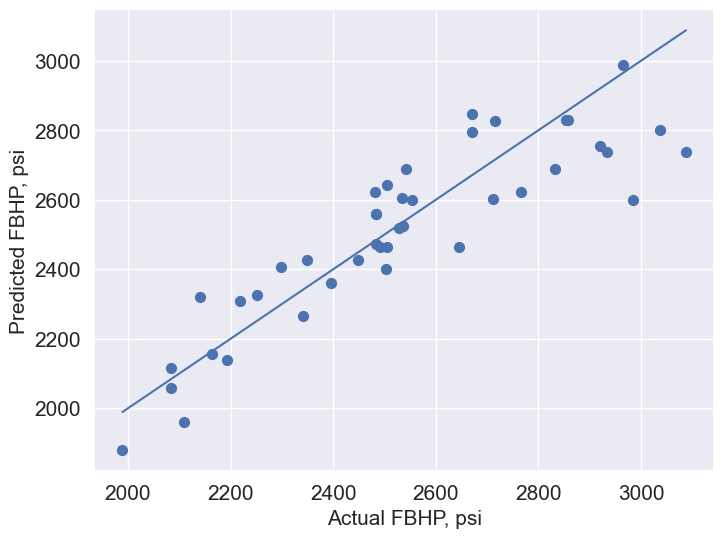

In [27]:
# ignore the warning
Warning('ignore')
# cross plot
fig, ax = plt.subplots(1, 1, figsize=(8,6))
# Create a scatter plot
ax.scatter(test_y, test_y_pred, marker='o', s=50, c='b', alpha=1)

# Add a 45-degree line
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], linestyle='-')

# Add labels and a title
plt.xlabel("Actual FBHP, psi", fontsize=15)
plt.ylabel("Predicted FBHP, psi",  fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# plt.savefig("cross plot.png", dpi=1600, bbox_inches='tight')
# Show the plot
plt.show()



# Decision Tree

In [28]:
train_X_dt = scaler_X.inverse_transform(train_X_scaled[df.columns[1:]])
train_X_dt = pd.DataFrame(train_X_dt, columns=df.columns[1:]) 
test_X_dt = scaler_X.inverse_transform(test_X_scaled[df.columns[1:]])
test_X_dt = pd.DataFrame(test_X_dt, columns=df.columns[1:])
print(train_X_dt.shape, train_y.shape)
print(test_X_dt.shape, test_y.shape)

(163, 13) (163, 1)
(42, 13) (42, 1)


In [29]:
train_X_dt.shape

(163, 13)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid to search over
param_grid = {'max_depth': [3, 5, 7, 10, None], 
              'min_samples_leaf': [1, 5, 10, 15, 20], 
              'min_samples_split': [2, 5, 10, 15, 20],
              'max_features': [None, 'sqrt', 'log2']}


# Create a decision tree regression model
model = DecisionTreeRegressor(random_state=42)

# Define the grid search object with cross-validation and the parameter grid
grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit the grid search object to the training data
grid.fit(train_X_dt, train_y)

# Get the best model from the grid search
best_model = grid.best_estimator_

# Make predictions on the test data
test_preds = best_model.predict(test_X_dt)

# Evaluate the model using mean squared error and R-squared
mae = mean_absolute_error(test_y, test_preds) 
mse = mean_squared_error(test_y, test_preds)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, test_preds)

# Get the RMSE scores for each fold and the corresponding hyperparameters
cv_results = pd.DataFrame(grid.cv_results_)
cv_results = cv_results[['params', 'mean_test_score', 'std_test_score']]
cv_results['RMSE'] = np.sqrt(-cv_results['mean_test_score'])
cv_results['std_test_score'] = np.sqrt(cv_results['std_test_score'])
cv_results = cv_results.sort_values('RMSE')

# Print the results
print('Best model parameters:', grid.best_params_)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)
print('Cross-validation results:')
cv_results[['params', 'RMSE', 'std_test_score']]


Best model parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Mean Absolute Error: 122.83939909297048
Root Mean Squared Error: 161.01718524168837
R-squared: 0.6760706335708841
Cross-validation results:


,params,RMSE,std_test_score
232,"{'max_depth': 10, 'max_features': None, 'min_s...",165.453137,92.179152
305,"{'max_depth': None, 'max_features': None, 'min...",165.453137,92.179152
306,"{'max_depth': None, 'max_features': None, 'min...",165.453137,92.179152
307,"{'max_depth': None, 'max_features': None, 'min...",165.453137,92.179152
231,"{'max_depth': 10, 'max_features': None, 'min_s...",165.453137,92.179152
...,...,...,...
53,"{'max_depth': 3, 'max_features': 'log2', 'min_...",242.477901,122.418771
126,"{'max_depth': 5, 'max_features': 'log2', 'min_...",243.697195,153.120694
101,"{'max_depth': 5, 'max_features': 'sqrt', 'min_...",243.697195,153.120694
325,"{'max_depth': None, 'max_features': 'sqrt', 'm...",244.457275,126.153454


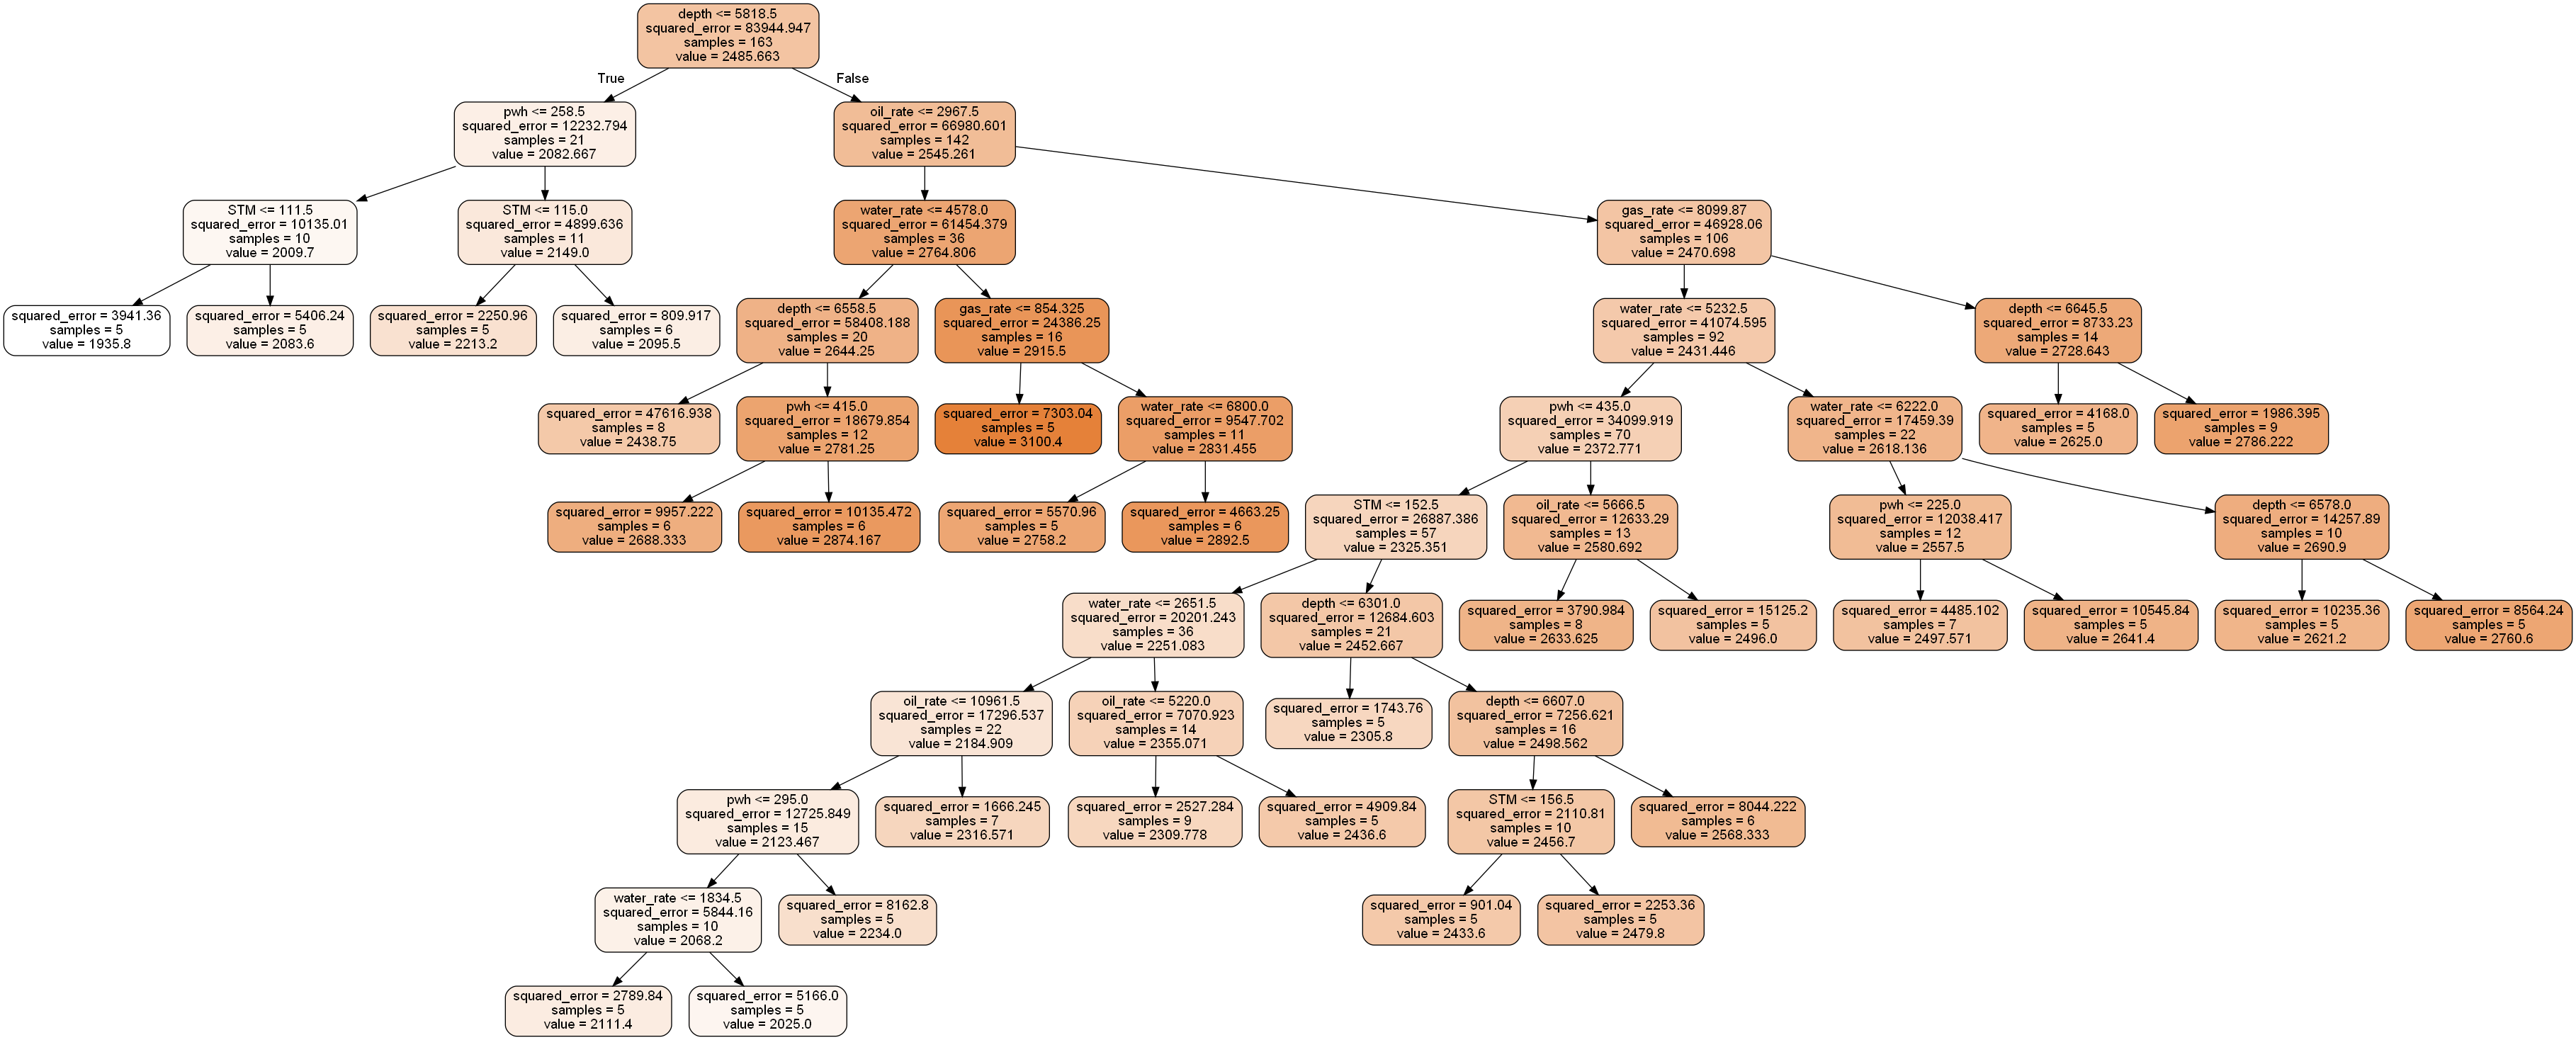

In [31]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz
# Create a decision tree regression model
model = DecisionTreeRegressor(max_depth= 10, 
                                max_features = None, 
                                min_samples_leaf = 5, 
                                min_samples_split= 2,
                                random_state=42)
# Visualize the decision tree using graphviz
dot_data = export_graphviz(best_model, out_file=None, feature_names=train_X_dt.columns, filled=True, rounded=True)
graph = graphviz.Source(dot_data)

# Display the graph in the Jupyter notebook
Image(graph.pipe(format='png'))


In [32]:
# Extract the decision rules
tree = best_model.tree_
feature_names = test_X_dt.columns
rules = []

def recurse(node, depth):
    indent = "  " * depth
    if tree.feature[node] != -2:
        name = feature_names[tree.feature[node]]
        threshold = tree.threshold[node]
        rules.append(f"{indent}if {name} <= {threshold:.2f}:")
        recurse(tree.children_left[node], depth + 1)
        rules.append(f"{indent}else:")
        recurse(tree.children_right[node], depth + 1)
    else:
        value = tree.value[node][0][0]
        rules.append(f"{indent}return {value:.2f}")

recurse(0, 0)

# Print the decision rules
for rule in rules:
    print(rule)


if depth <= 5818.50:
  if pwh <= 258.50:
    if STM <= 111.50:
      return 1935.80
    else:
      return 2083.60
  else:
    if STM <= 115.00:
      return 2213.20
    else:
      return 2095.50
else:
  if oil_rate <= 2967.50:
    if water_rate <= 4578.00:
      if depth <= 6558.50:
        return 2438.75
      else:
        if pwh <= 415.00:
          return 2688.33
        else:
          return 2874.17
    else:
      if gas_rate <= 854.32:
        return 3100.40
      else:
        if water_rate <= 6800.00:
          return 2758.20
        else:
          return 2892.50
  else:
    if gas_rate <= 8099.87:
      if water_rate <= 5232.50:
        if pwh <= 435.00:
          if STM <= 152.50:
            if water_rate <= 2651.50:
              if oil_rate <= 10961.50:
                if pwh <= 295.00:
                  if water_rate <= 1834.50:
                    return 2111.40
                  else:
                    return 2025.00
                else:
                  return

In [33]:
# Get the feature importances
importances = best_model.feature_importances_

# Create a pandas dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature':test_X_dt.columns, 'Importance':importances})

# Sort the dataframe by feature importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importances)

            Feature  Importance
3             depth    0.384140
0          oil_rate    0.209144
2        water_rate    0.166070
1          gas_rate    0.105825
7               pwh    0.083850
5               STM    0.050971
4       oil_gravity    0.000000
6               BTM    0.000000
8   tubing_id_1.995    0.000000
9   tubing_id_2.441    0.000000
10  tubing_id_2.992    0.000000
11  tubing_id_3.813    0.000000
12  tubing_id_3.958    0.000000
